In [5]:
%matplotlib inline

In [6]:
from __future__ import division

In [7]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import patsy
import sklearn
import random

sns.set(style="darkgrid")

# Data Kata 6


This question focuses on clustering. The documentation for Scikit Learn has a very nice overview of [clustering and clustering algorithms](http://scikit-learn.org/stable/modules/clustering.html). You should use the [Wheat Seeds](https://archive.ics.uci.edu/ml/datasets/seeds) data set at the UCI Data Repository. The data set contains seven variables followed by a class "label" (number) that indicates what kind of wheat the seed is. Do not use that label for the clustering part of the problem.

Please do the following:

1. Download the data and check it out (they report there are no missing values but you never know). Load it into the notebook.
2. Do a simple scatterplot EDA of all 7 variables against each other. *Ignore the class label unless told otherwise*. Do you see any patterns that suggest a number of k to use for the k-means clustering algorithm? What do you think that value is?
3. Using the [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class from scikit-learn for 5 different values of k = {2, 3, 4, 5, 6}. Plot each result by repeating your 7 vs. 7 plots from above but clearly indicate the cluster centers and color the points according to each cluster. Clearly indicate what k is being calculated and plotted.
4. For k = 3, compare the clusters you derive to the actual class labels. How many "errors" are there? Why do you think these errors exist?
5. k-means finds convex ("spherical") clusters with equal variance/covariance. Replot the data from Part 2 but this time color the points based on their *actual* class labels. Are the classes actually equally sized and convex? If not, what clustering algorithm would be more appropriate? (See the clustering documentation from the scikit-learn site, above).
6. Clustering is used a lot in marketing segmentation and other data science applications. Since you don't have "real" class labels, how might you go about doing a sanity check on your clusters? For example, the centroids are meant to be prototypes...can you verify that the centroids are indeed prototypical? How? Any else you might try before unleashing the clusters on your marketing department?

Use as many code and markdown cells as you need...

In [8]:
#Note to self: had to fix a few tab spaces in the file
#Also, added the column names to the text file
df=pd.read_csv('seeds_dataset.txt',sep='\t',)

#store truth and delete it from the dataframe
truth=df.truth-1 #make it start at 0 (starts at 1)
del df["truth"]

Let's take a quick look at the data:

In [9]:
df.describe()

area   perimeter  compactness   kernelLen  kernelWidth  \
count  210.000000  210.000000   210.000000  210.000000   210.000000   
mean    14.847524   14.559286     0.870999    5.628533     3.258605   
std      2.909699    1.305959     0.023629    0.443063     0.377714   
min     10.590000   12.410000     0.808100    4.899000     2.630000   
25%     12.270000   13.450000     0.856900    5.262250     2.944000   
50%     14.355000   14.320000     0.873450    5.523500     3.237000   
75%     17.305000   15.715000     0.887775    5.979750     3.561750   
max     21.180000   17.250000     0.918300    6.675000     4.033000   

       assymetryCoeff  kernelGrooveLen  
count      210.000000       210.000000  
mean         3.700201         5.408071  
std          1.503557         0.491480  
min          0.765100         4.519000  
25%          2.561500         5.045000  
50%          3.599000         5.223000  
75%          4.768750         5.877000  
max          8.456000         6.550000

Before doing anything with the data, let's make sure they are all mean centered and have equal variance:

In [10]:
def scale( df, variable):
    x_bar = df[ variable].mean()
    std = df[ variable].std()
    scaled_variable = (df[ variable] - x_bar) / (2.0 * std)
    df[ variable + "_scaled"] = scaled_variable
    del df[variable]
for col in df.columns:
    scale(df,col)

In [11]:
df.describe()

area_scaled  perimeter_scaled  compactness_scaled  kernelLen_scaled  \
count  2.100000e+02      2.100000e+02        2.100000e+02      2.100000e+02   
mean  -1.127141e-15     -1.283365e-15        7.013900e-16     -2.066072e-15   
std    5.000000e-01      5.000000e-01        5.000000e-01      5.000000e-01   
min   -7.316089e-01     -8.228766e-01       -1.330938e+00     -8.232831e-01   
25%   -4.429193e-01     -4.247017e-01       -2.983267e-01     -4.133531e-01   
50%   -8.463483e-02     -9.161305e-02        5.187239e-02     -1.185308e-01   
75%    4.222904e-01      4.424773e-01        3.549903e-01      3.963503e-01   
max    1.088167e+00      1.030168e+00        1.000901e+00      1.180944e+00   

       kernelWidth_scaled  assymetryCoeff_scaled  kernelGrooveLen_scaled  
count        2.100000e+02           2.100000e+02            2.100000e+02  
mean        -1.311121e-16           1.913813e-16           -8.458842e-17  
std          5.000000e-01           5.000000e-01            5.000000e-01  
min         -8.321164e-01          -9.760524e-01           -9.044829e-01  
25%         -4.164585e-01          -3.786690e-01           -3.693650e-01  
50%         -2.859933e-02          -3.365384e-02           -1.882795e-01  
75%          4.012889e-01           3.553404e-01            4.770571e-01  
max          1.025107e+00           1.581516e+00            1.161723e+00

Question 2: Do a simple scatterplot EDA of all 7 variables against each other. Ignore the class label unless told otherwise. Do you see any patterns that suggest a number of k to use for the k-means clustering algorithm? What do you think that value is?

Answer:

Let's quickly do some data munging first:

In [12]:
#import this first in a separate cell
import itertools

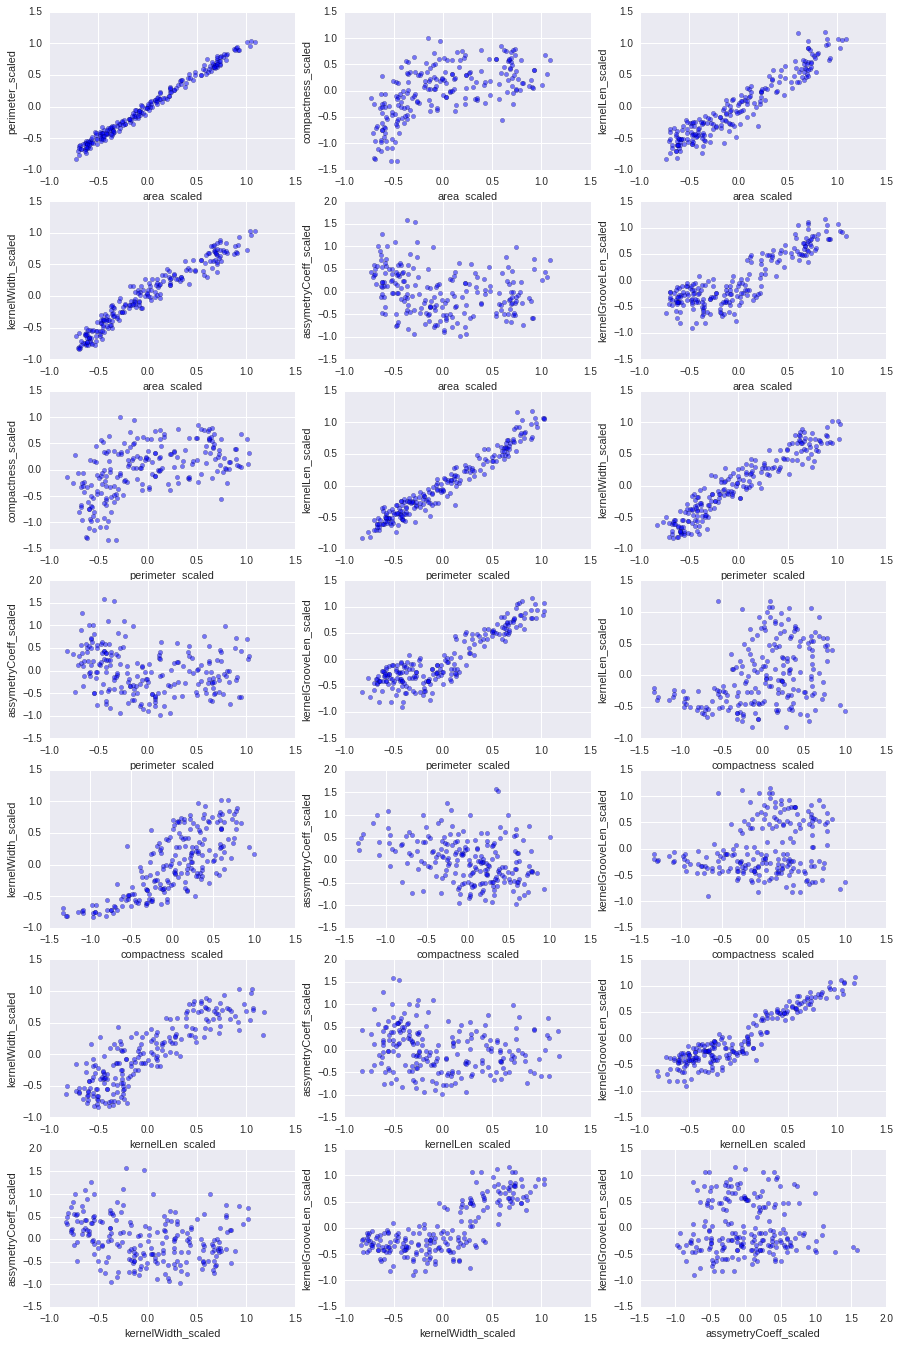

In [13]:
figure = plt.figure(figsize=(15, 30))

theCols=df.columns
# for every combination of length 2, get the tuple and do EDA on those 2 properties
for i,subset in enumerate(itertools.combinations(df.columns, 2)):
    axes = figure.add_subplot(9, 3,i+1)
    axes.scatter(df[subset[0]],df[subset[1]],alpha=0.5)
    
    axes.set_xlabel(subset[0])
    axes.set_ylabel(subset[1])


Yes, there are patterns in SOME of the plots that could help us estimate k for the k-clustering algorithm. In the majority of the plots one pattern exists: variables kernel lenght, kernel width, and kernel groove lenght suggest that there are 2 groups. 

Our suspicion is that there are 2 groups, most clearly seen in compactness vs. kernel groove length and kernel width vs. kernel groove length.

Question 3: Using the [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class from scikit-learn for 5 different values of k = {2, 3, 4, 5, 6}. Plot each result by repeating your 7 vs. 7 plots from above but clearly indicate the cluster centers and color the points according to each cluster. Clearly indicate what k is being calculated and plotted.

In [14]:
from sklearn.cluster import KMeans

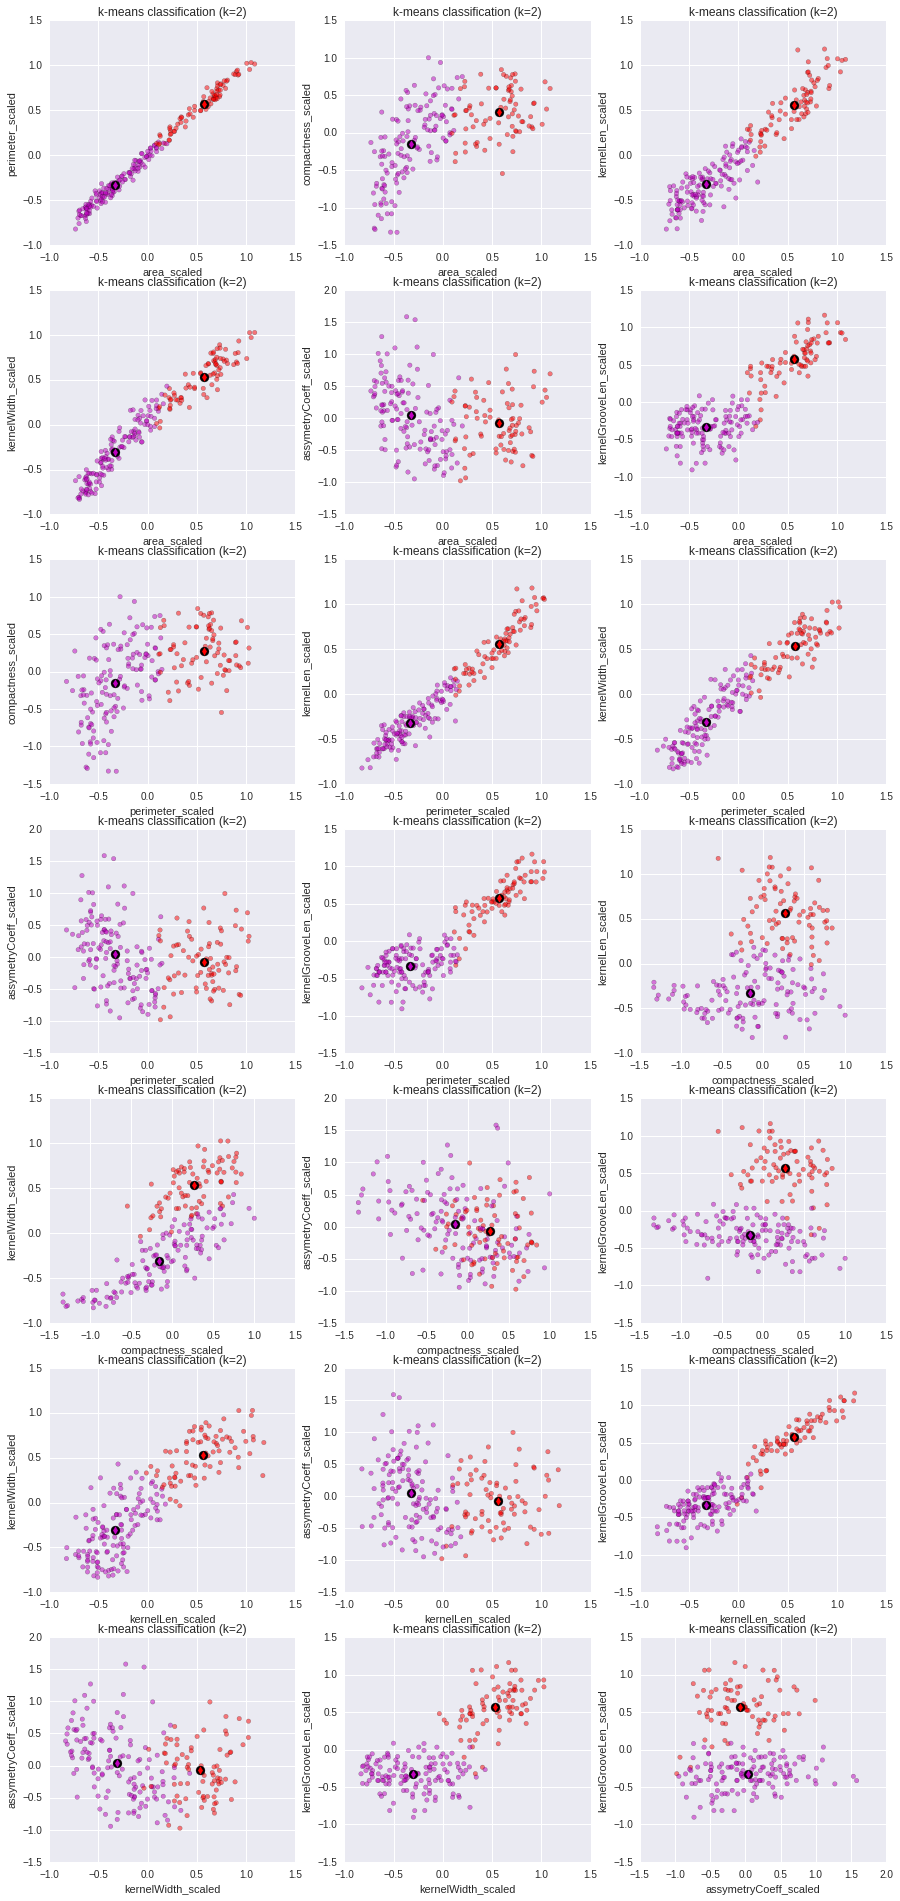

In [15]:
nClusters=2
estimator=KMeans(n_clusters=nClusters,random_state=1) #random_state set to 1 for reproducible labels 

estimator.fit(df.values)

#get the labels
labels = estimator.labels_
centers= estimator.cluster_centers_ #array, [n_clusters, n_features]

centersDict={}#for every group
for i in range(len(centers)):
    #get ith group's centers
    for j,col in enumerate(theCols):
        centersDict[col+str(i)]=centers[i][j]
        
color=['r','m','g','black','c','blue']
colorLabels=[]
#get the color for the labels
for label in labels:
    colorLabels.append(color[label])#labels always start at 0
    
#------PLOTS
figure = plt.figure(figsize=(15, 33))

# for every combination of length 2, get the tuple and do EDA on those 2 properties
for i,subset in enumerate(itertools.combinations(df.columns, 2)):
    axes = figure.add_subplot(7, 3,i+1)
    axes.scatter(df[subset[0]],df[subset[1]],alpha=0.5,c=colorLabels)
    for j in range(len(centers)):
        axes.scatter(centersDict[subset[0]+str(j)],centersDict[subset[1]+str(j)],c='black',marker='o',s=80)
        axes.scatter(centersDict[subset[0]+str(j)],centersDict[subset[1]+str(j)],c=color[j],marker='d',s=40)

    axes.set_xlabel(subset[0])
    axes.set_ylabel(subset[1])
    axes.set_title('k-means classification (k='+str(nClusters)+')')
    #axes.legend(['cluster #1','cluster #2','cluster #4'])

Before we move on to the other cases, the black dots represent a cluster's center. Inside the black dot there is a color which represents the group. 

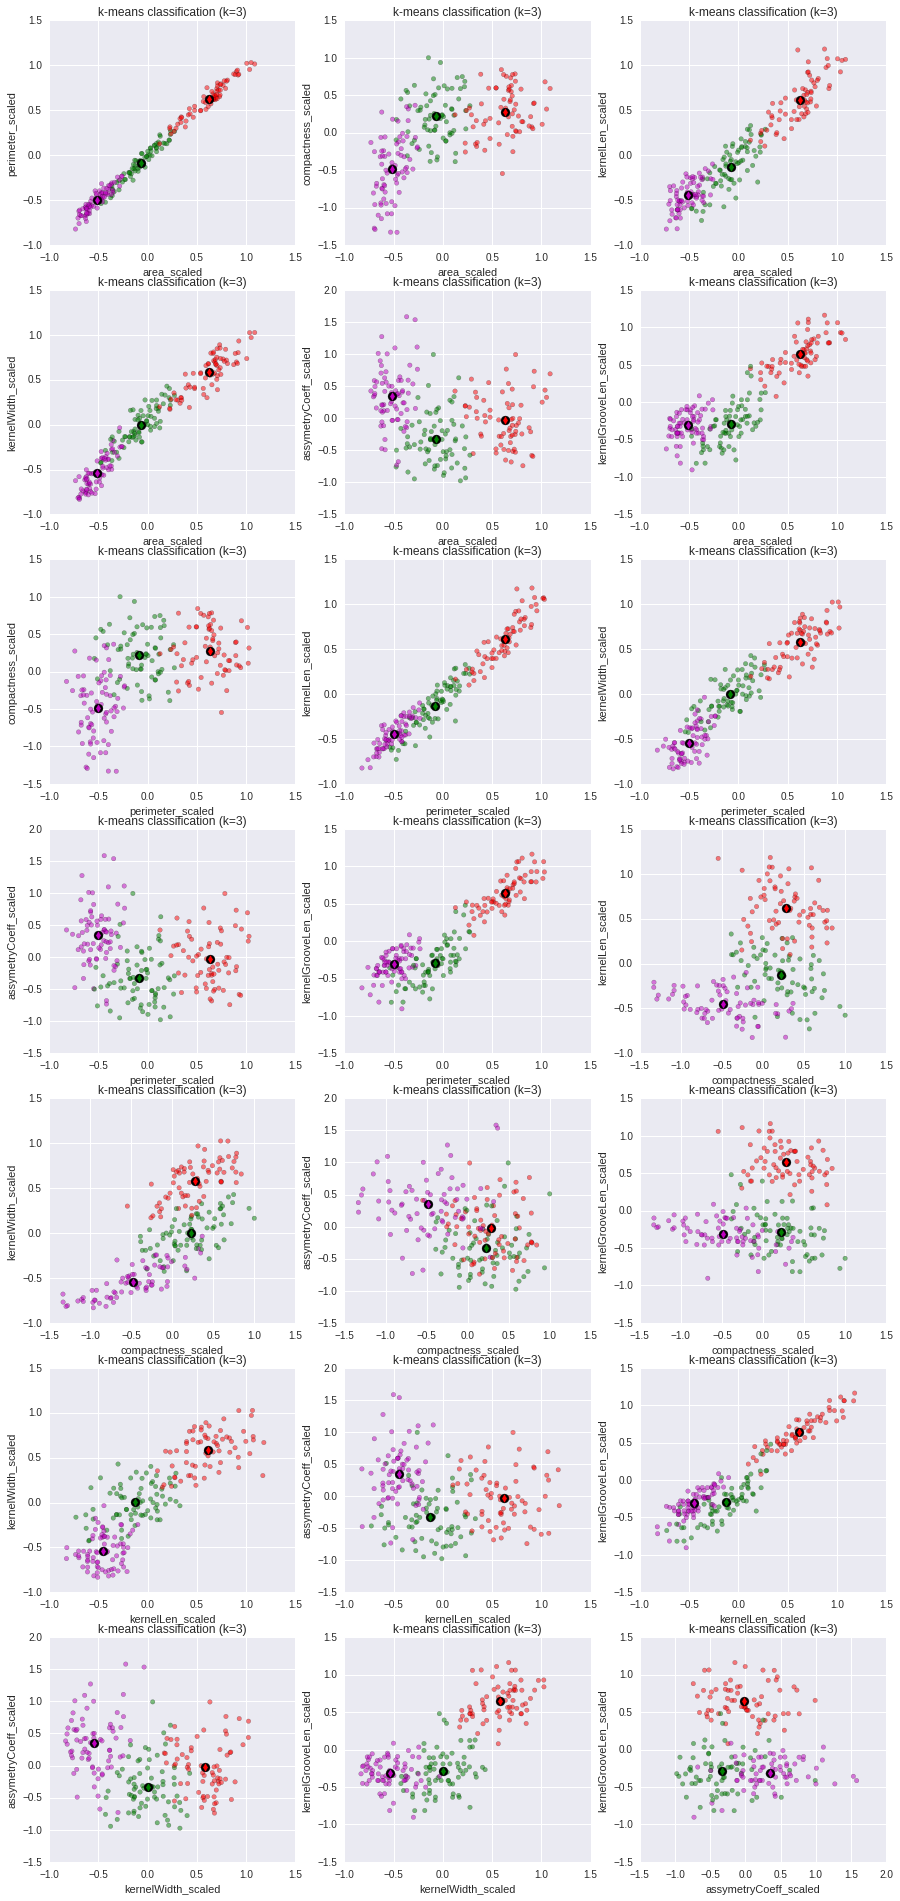

In [16]:
nClusters=3
estimator=KMeans(n_clusters=nClusters,random_state=1)
#get the k-Means
#--note that input has shape=(n_samples, n_features)

estimator.fit(df.values)

#get the labels
labelsk3 = estimator.labels_
centers= estimator.cluster_centers_ #array, [n_clusters, n_features]

centersDict={}#for every group
for i in range(len(centers)):
    #get ith group's centers
    for j,col in enumerate(theCols):
        centersDict[col+str(i)]=centers[i][j]
        
color=['r','m','g','black','c','blue']
colorLabels=[]
#get the color for the labels
for label in labelsk3:
    colorLabels.append(color[label])#labels always start at 0
    
#------PLOTS
figure = plt.figure(figsize=(15, 33))

# for every combination of length 2, get the tuple and do EDA on those 2 properties
for i,subset in enumerate(itertools.combinations(df.columns, 2)):
    axes = figure.add_subplot(7, 3,i+1)
    axes.scatter(df[subset[0]],df[subset[1]],alpha=0.5,c=colorLabels)
    for j in range(len(centers)):
        axes.scatter(centersDict[subset[0]+str(j)],centersDict[subset[1]+str(j)],c='black',marker='o',s=80)
        axes.scatter(centersDict[subset[0]+str(j)],centersDict[subset[1]+str(j)],c=color[j],marker='d',s=40)

    axes.set_xlabel(subset[0])
    axes.set_ylabel(subset[1])
    axes.set_title('k-means classification (k='+str(nClusters)+')')
    #axes.legend(['cluster #1','cluster #2','cluster #4'])

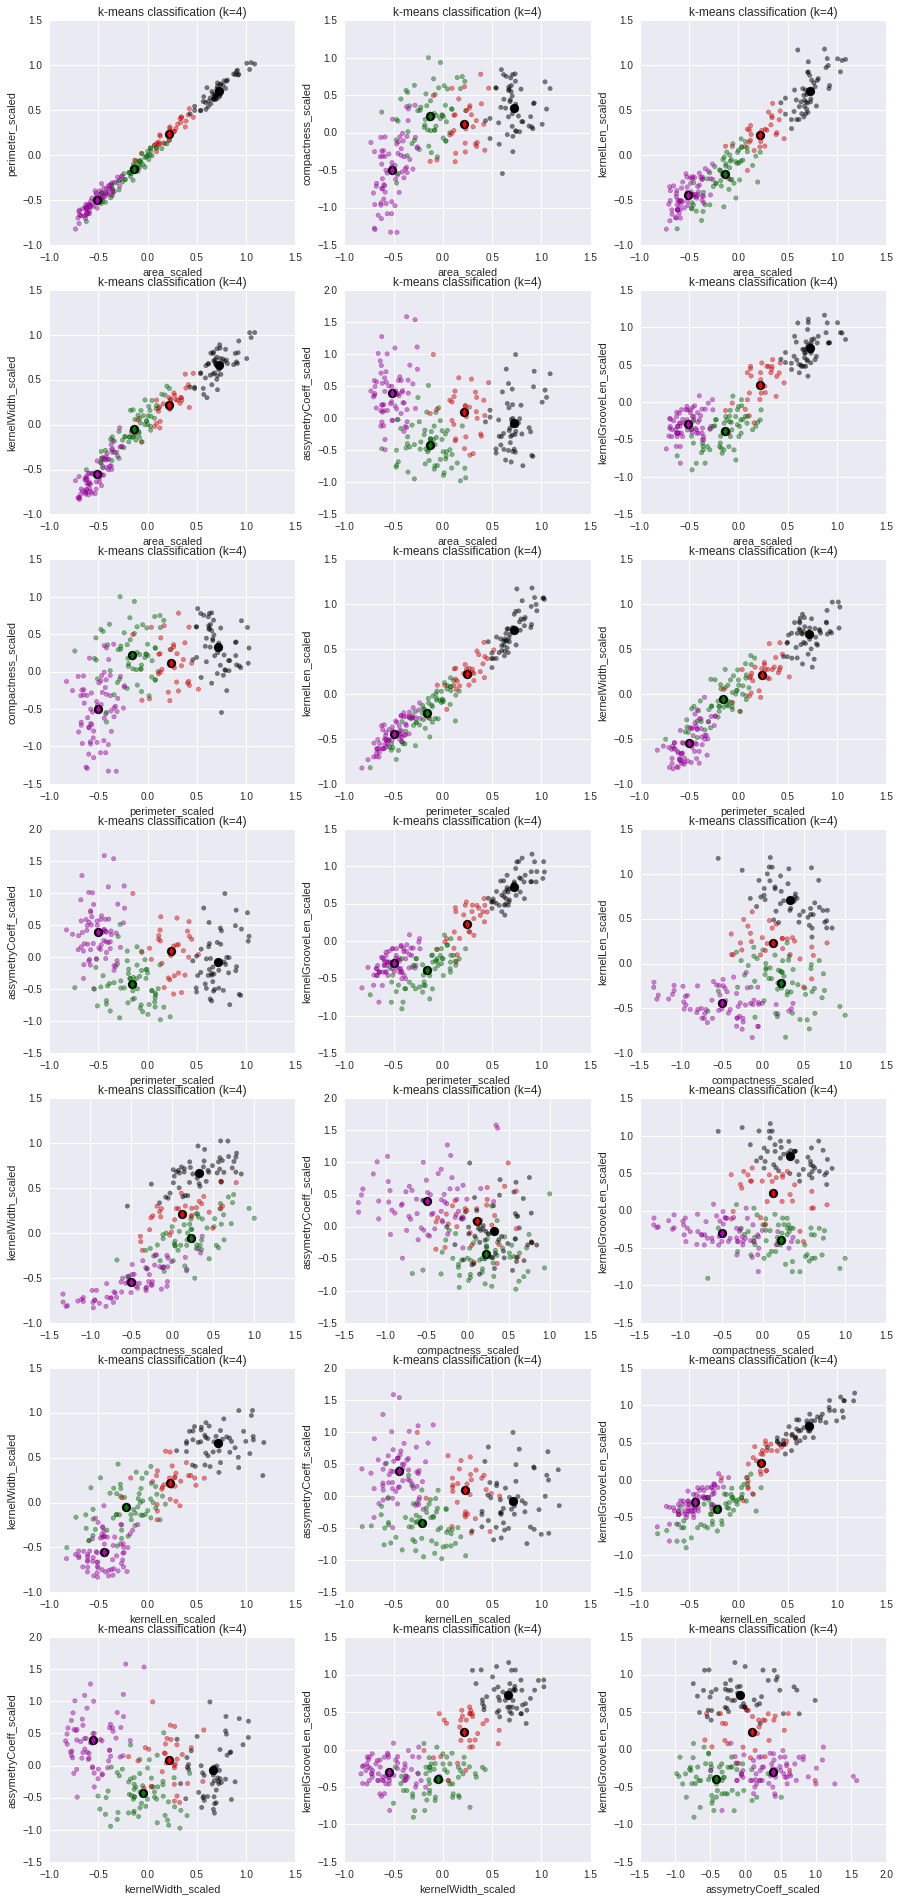

In [17]:
nClusters=4
estimator=KMeans(n_clusters=nClusters,random_state=1)
#get the k-Means
#--note that input has shape=(n_samples, n_features)

estimator.fit(df.values)

#get the labels
labels = estimator.labels_
centers= estimator.cluster_centers_ #array, [n_clusters, n_features]

centersDict={}#for every group
for i in range(len(centers)):
    #get ith group's centers
    for j,col in enumerate(theCols):
        centersDict[col+str(i)]=centers[i][j]
        
color=['r','m','g','black','c','blue']
colorLabels=[]
#get the color for the labels
for label in labels:
    colorLabels.append(color[label])#labels always start at 0
    
#------PLOTS
figure = plt.figure(figsize=(15, 33))

# for every combination of length 2, get the tuple and do EDA on those 2 properties
for i,subset in enumerate(itertools.combinations(df.columns, 2)):
    axes = figure.add_subplot(7, 3,i+1)
    axes.scatter(df[subset[0]],df[subset[1]],alpha=0.5,c=colorLabels)
    for j in range(len(centers)):
        axes.scatter(centersDict[subset[0]+str(j)],centersDict[subset[1]+str(j)],c='black',marker='o',s=80)
        axes.scatter(centersDict[subset[0]+str(j)],centersDict[subset[1]+str(j)],c=color[j],marker='d',s=40)

    axes.set_xlabel(subset[0])
    axes.set_ylabel(subset[1])
    axes.set_title('k-means classification (k='+str(nClusters)+')')
    #axes.legend(['cluster #1','cluster #2','cluster #4'])

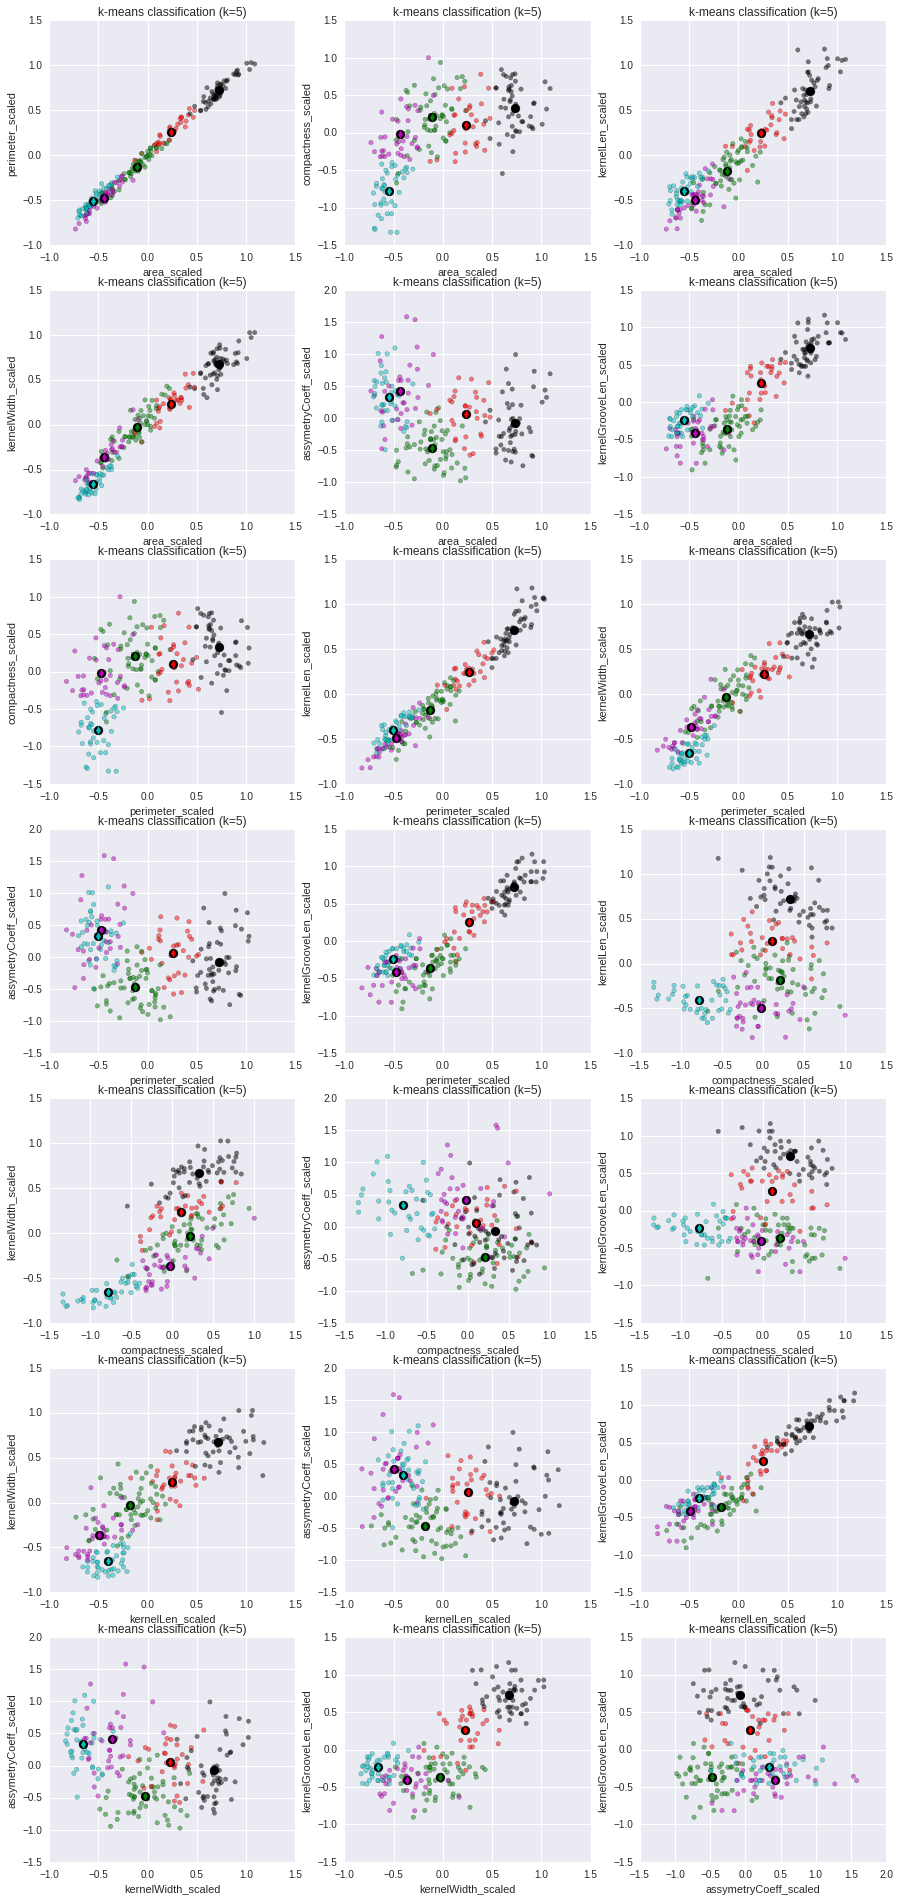

In [18]:
nClusters=5
estimator=KMeans(n_clusters=nClusters,random_state=1)
#get the k-Means
#--note that input has shape=(n_samples, n_features)

estimator.fit(df.values)

#get the labels
labels = estimator.labels_
centers= estimator.cluster_centers_ #array, [n_clusters, n_features]

centersDict={}#for every group
for i in range(len(centers)):
    #get ith group's centers
    for j,col in enumerate(theCols):
        centersDict[col+str(i)]=centers[i][j]
        
color=['r','m','g','black','c','blue']
colorLabels=[]
#get the color for the labels
for label in labels:
    colorLabels.append(color[label])#labels always start at 0
    
#------PLOTS
figure = plt.figure(figsize=(15, 33))

# for every combination of length 2, get the tuple and do EDA on those 2 properties
for i,subset in enumerate(itertools.combinations(df.columns, 2)):
    axes = figure.add_subplot(7, 3,i+1)
    axes.scatter(df[subset[0]],df[subset[1]],alpha=0.5,c=colorLabels)
    for j in range(len(centers)):
        axes.scatter(centersDict[subset[0]+str(j)],centersDict[subset[1]+str(j)],c='black',marker='o',s=80)
        axes.scatter(centersDict[subset[0]+str(j)],centersDict[subset[1]+str(j)],c=color[j],marker='d',s=40)

    axes.set_xlabel(subset[0])
    axes.set_ylabel(subset[1])
    axes.set_title('k-means classification (k='+str(nClusters)+')')
    #axes.legend(['cluster #1','cluster #2','cluster #4'])

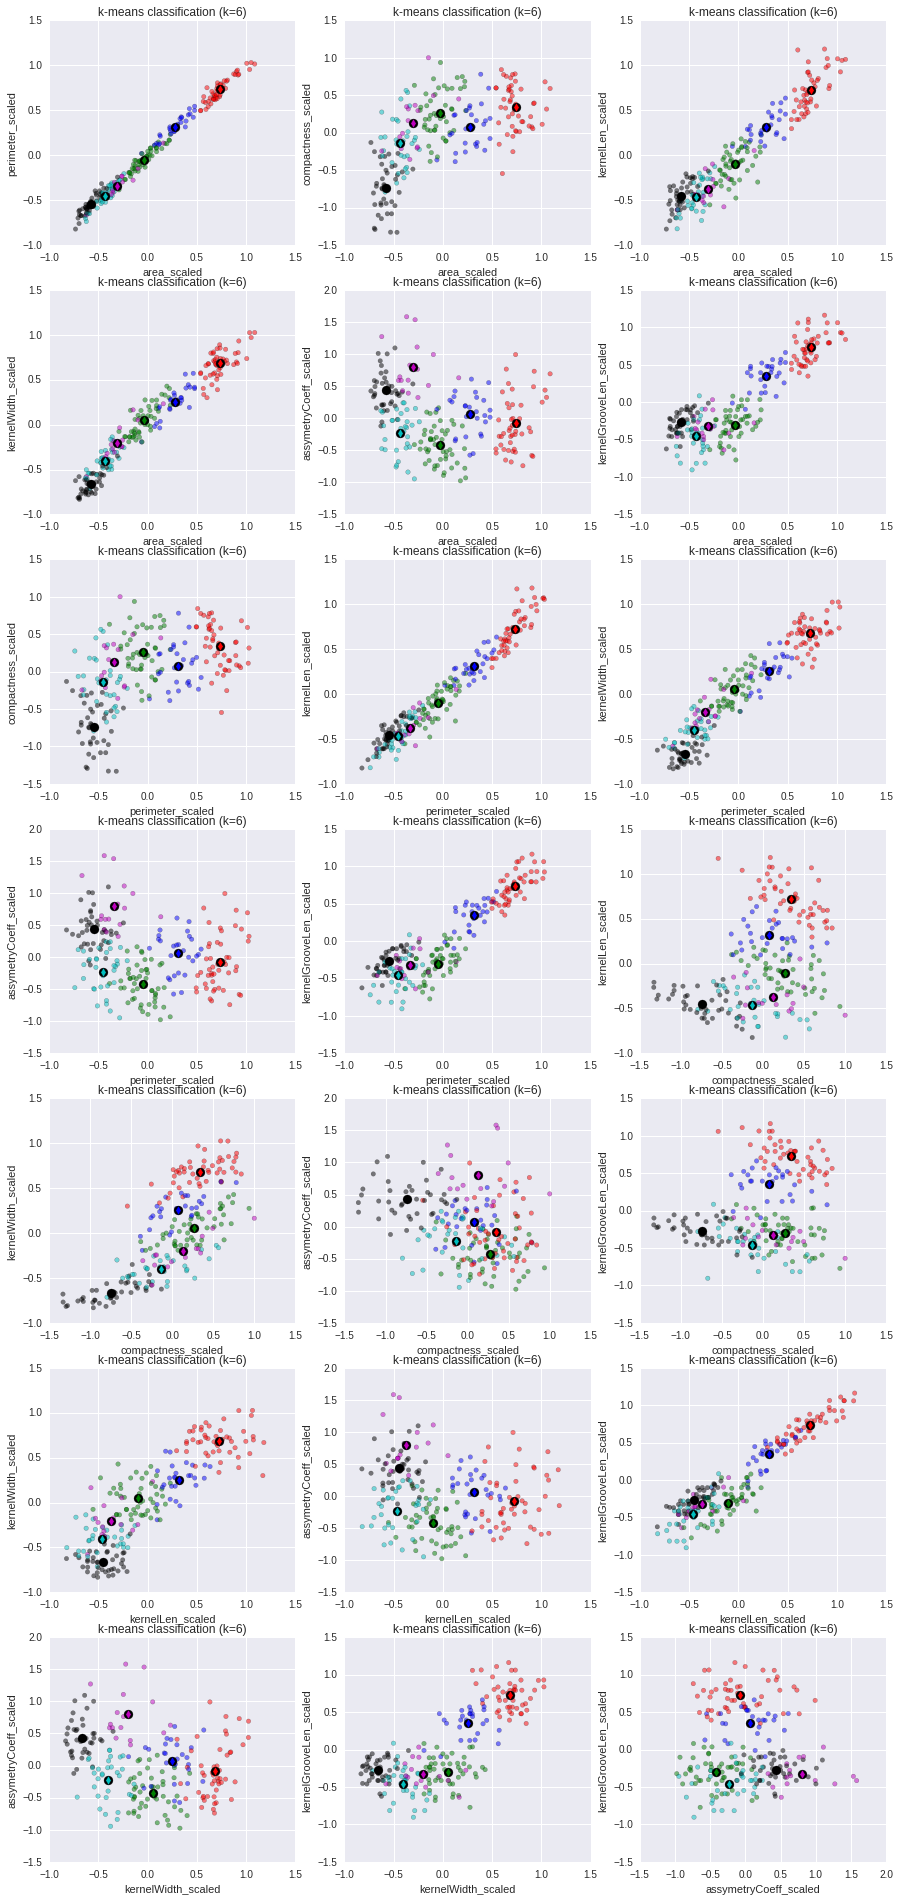

In [19]:
nClusters=6
estimator=KMeans(n_clusters=nClusters,random_state=1)
#get the k-Means
#--note that input has shape=(n_samples, n_features)

estimator.fit(df.values)

#get the labels
labels = estimator.labels_
centers= estimator.cluster_centers_ #array, [n_clusters, n_features]

centersDict={}#for every group
for i in range(len(centers)):
    #get ith group's centers
    for j,col in enumerate(theCols):
        centersDict[col+str(i)]=centers[i][j]
        
color=['r','m','g','black','c','blue']
colorLabels=[]
#get the color for the labels
for label in labels:
    colorLabels.append(color[label])#labels always start at 0
    
#------PLOTS
figure = plt.figure(figsize=(15, 33))

# for every combination of length 2, get the tuple and do EDA on those 2 properties
for i,subset in enumerate(itertools.combinations(df.columns, 2)):
    axes = figure.add_subplot(7, 3,i+1)
    axes.scatter(df[subset[0]],df[subset[1]],alpha=0.5,c=colorLabels)
    for j in range(len(centers)):
        axes.scatter(centersDict[subset[0]+str(j)],centersDict[subset[1]+str(j)],c='black',marker='o',s=80)
        axes.scatter(centersDict[subset[0]+str(j)],centersDict[subset[1]+str(j)],c=color[j],marker='d',s=40)

    axes.set_xlabel(subset[0])
    axes.set_ylabel(subset[1])
    axes.set_title('k-means classification (k='+str(nClusters)+')')
    #axes.legend(['cluster #1','cluster #2','cluster #4'])

Question 4: For k = 3, compare the clusters you derive to the actual class labels. How many "errors" are there? Why do you think these errors exist?

Answer: First, let's define the error metric: in this case, the "error-rate" will be define as the number of errors divided by the number of observations. Errors will be defined as those cases where the label was not correct.

There is a slight problem with the labeling correspondence between the classifier and the truth data:

truth is the true label, labelsk3 (lables for k=3) are the labels when k=3:

* truth's 0 corresponds to labelsk3's 2
* truth's 1 corresponds to labelsk3's 0, and 
* truth's 2 corresponds to labelsk3's 1. 

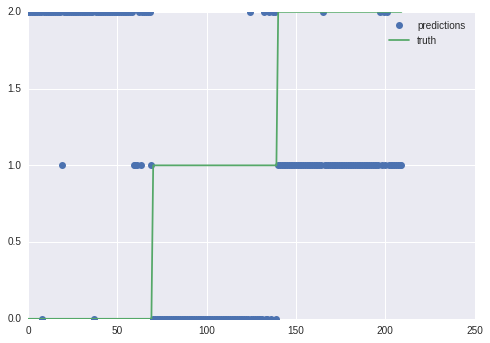

In [20]:
plt.plot(labelsk3,"o")
plt.plot(truth)
plt.legend(['predictions','truth'])
#a problem here is that 
#truth's 0 corresponds to labelsk3's 2
#truth's 1 corresponds to labelsk3's 0, and 
#truth's 2 corresponds to labelsk3's 1. 

#now, this correspondence is ALWAYS true as long as one uses a random_state when calling kMeans. 
labelsk3Idx0=labelsk3==0
labelsk3Idx1=labelsk3==1
labelsk3Idx2=labelsk3==2

#now do conversions
labelsk3[labelsk3Idx0]=1
labelsk3[labelsk3Idx1]=2
labelsk3[labelsk3Idx2]=0

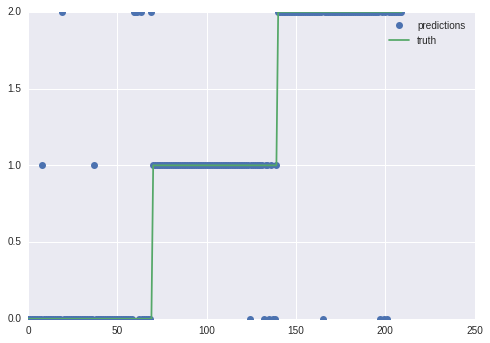

In [21]:
plt.plot(labelsk3,"o")
plt.plot(truth)
plt.legend(['predictions','truth'])

In [22]:
errorRate=sum(truth!=labelsk3)/len(truth)

print "The error rate is",errorRate
        

The error rate is 0.0809523809524


We are a bit suprised to know that 1 in 10 observations are misclassified under this classifier. The plots, albeit not the best way to assess this, show very good separation in some of the variable combinations. Now, after carefully looking at the k=3 case, it can be seen that two groups overlap in all the plots, although the overlapping is very small. 

Looking at the plot above comparing predictions vs. truth, this can be seen: most of the errors come from misclassifying group 1 (represented by label 0) and group 2 (represented by label 1). Group 3 compared to the other groups (represented by label 2) seems to have a lower error rate than the average error-rate (0.10) we have calculated above. Average in the sense that it includes errors from all 3 groups. 

Question 5: k-means finds convex ("spherical") clusters with equal variance/covariance. Replot the data from Part 2 but this time color the points based on their *actual* class labels. Are the classes actually equally sized and convex? If not, what clustering algorithm would be more appropriate? (See the clustering documentation from the scikit-learn site, above).

Answer: Let's color code the observations based on their TRUE label (we commented out line 21 and added 22):

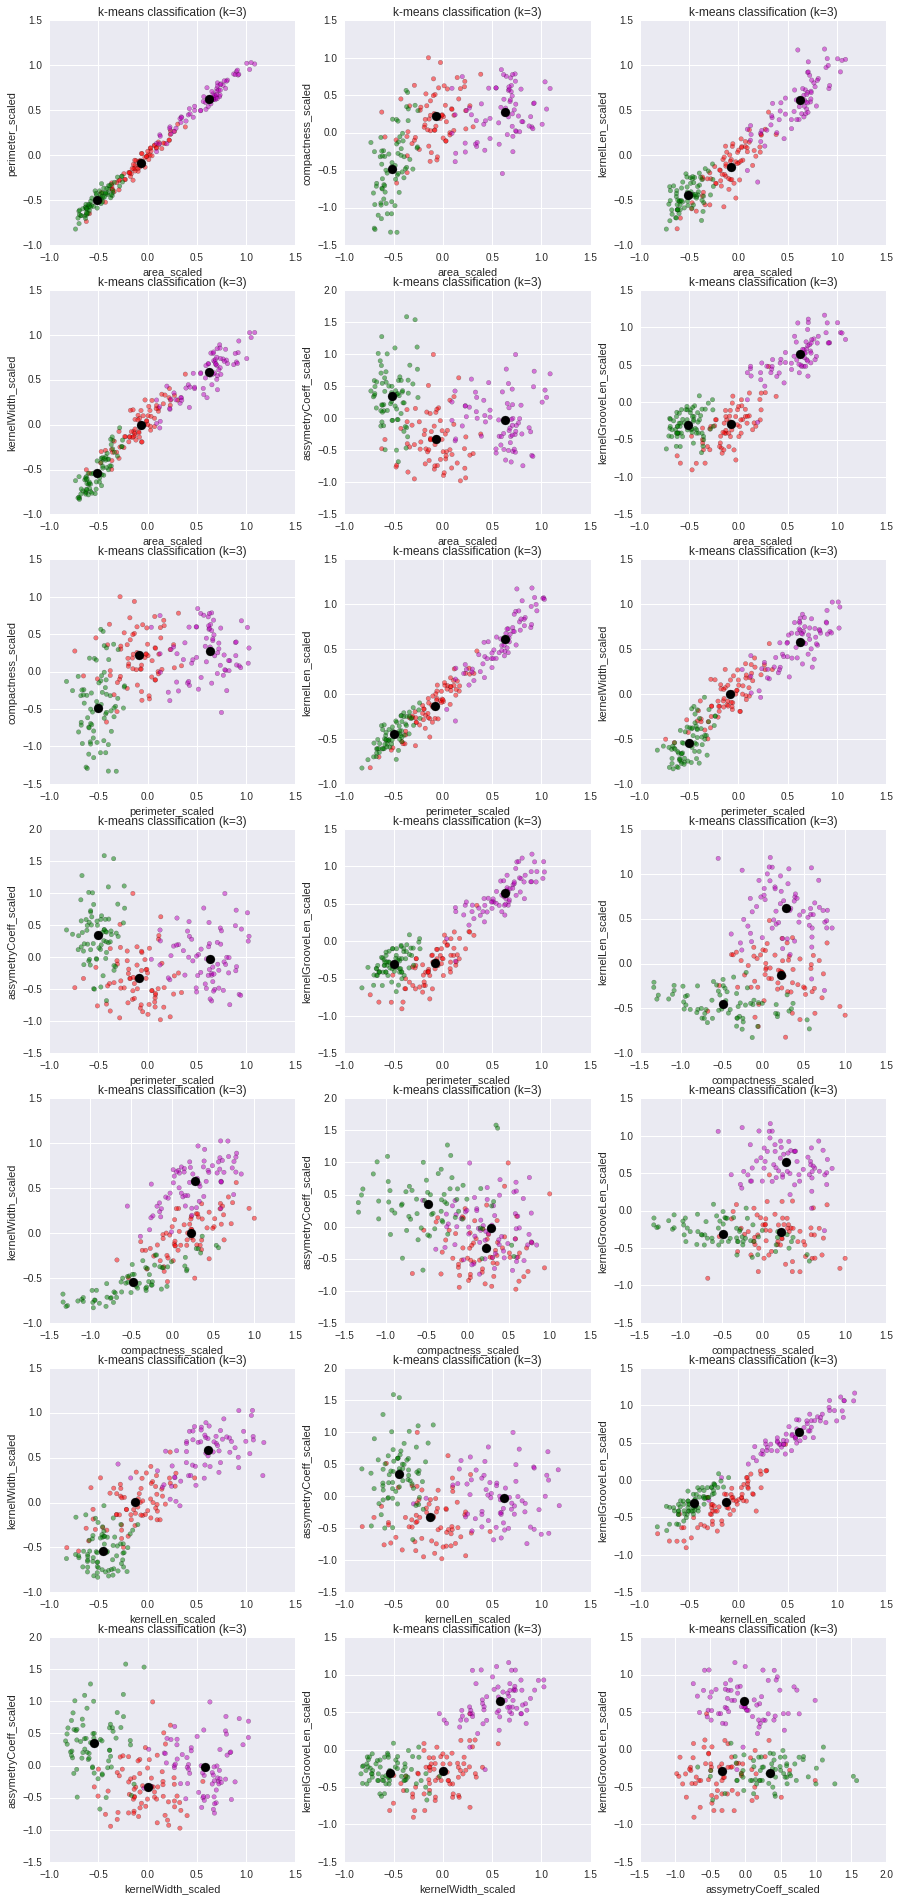

In [23]:
nClusters=3
estimator=KMeans(n_clusters=nClusters,random_state=1)
#get the k-Means
#--note that input has shape=(n_samples, n_features)

estimator.fit(df.values)

#get the labels
labelsk3 = estimator.labels_
centers= estimator.cluster_centers_ #array, [n_clusters, n_features]

centersDict={}#for every group
for i in range(len(centers)):
    #get ith group's centers
    for j,col in enumerate(theCols):
        centersDict[col+str(i)]=centers[i][j]
        
color=['r','m','g','black','c','blue']
colorLabels=[]
#get the color for the labels
#for label in labelsk3:
for label in truth:
    colorLabels.append(color[label])#labels always start at 0
    
#------PLOTS
figure = plt.figure(figsize=(15, 33))

# for every combination of length 2, get the tuple and do EDA on those 2 properties
for i,subset in enumerate(itertools.combinations(df.columns, 2)):
    axes = figure.add_subplot(7, 3,i+1)
    axes.scatter(df[subset[0]],df[subset[1]],alpha=0.5,c=colorLabels)
    for j in range(len(centers)):
        axes.scatter(centersDict[subset[0]+str(j)],centersDict[subset[1]+str(j)],c='black',marker='o',s=80)

    axes.set_xlabel(subset[0])
    axes.set_ylabel(subset[1])
    axes.set_title('k-means classification (k='+str(nClusters)+')')
    #axes.legend(['cluster #1','cluster #2','cluster #4'])

It can be seen the assumption of equal covariance is not true (a good example is kernel length vs. kernel groove length.  This example shows how a classifier would benefit from knowing the actual "shape" of the class, especifically when computing the distance. 

The Gaussian Mixture Model clustering algorithm would be a better fit since it uses as a metric the Mahalanobis distance. This statistical distance takes into account the "shape" or covariance matrix of the cluster. 

References: 
http://scikit-learn.org/stable/modules/clustering.html#clustering
http://scikit-learn.org/stable/modules/mixture.html#mixture

Question 6: 
Clustering is used a lot in marketing segmentation and other data science applications. Since you don't have "real" class labels, how might you go about doing a sanity check on your clusters? For example, the centroids are meant to be prototypes...can you verify that the centroids are indeed prototypical? How? Any else you might try before unleashing the clusters on your marketing department?

We would identify which cluster represents a segment of our customer base. Then, we would pick a few observations that we KNOW for sure belong to each segment, and check which group the clustering algorithm assigned it to. 

We are not sure if it is possible to assert whether the centroids are prototypical. One idea we have is to simply label ourself enough observations (30 per segment/cluster?) such that we can get an idea of its distribution. Then, we could compare this to the whole dataset. 

In terms of trying more things before providing this analysis to the marketing department: since there are no labels, we would try different clustering algorithms and compare their results. If different clustering algorithms provide consistent or similar results, it could be a hint that one as unravel the underlying structure. Whether it is useful or not is a problem for the marketing deparment to solve, or not? 